# 1. Data import

## 1.1 Importing the dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import math as math
from scipy import stats
import importlib
import project_functions

Here, we import functions we created in a previous notebook, so we can clean / reformat the column headers

In [2]:
importlib.reload(project_functions)
from project_functions import *

Now, we 'instance' our dataframes so we precise to Python to read them:

In [3]:
df_pt1 = pd.read_csv('../raw_data/df_final_web_data_pt_1.txt')
df_pt2 = pd.read_csv('..//raw_data/df_final_web_data_pt_2.txt')
df_users = pd.read_csv('../raw_data/df_final_demo.txt')
df_exp =pd.read_csv('../raw_data/df_final_experiment_clients.txt')

We apply column titles cleaning to every dataframe

In [4]:
# cleaning the columns : changing the columns headers to correct format
# for more information about this function --> cf project_functions.py notebook
clean_my_columns = project_functions.clean_my_columns

clean_my_columns(df_exp)
clean_my_columns(df_users)
clean_my_columns(df_pt1)
clean_my_columns(df_pt2)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## 1.2 Looking at the dataframes

### 1.2.0 Info about DF's

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [6]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df_pt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [8]:
df_pt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


### 1.2.1 DF "Experiment participation"

The exp dataframe states whether a client (client_id) is being redirected on the original version (control) or to the new version (test)

In [9]:
display(df_exp)
df_exp.shape

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


(70609, 2)

### 1.2.2 DF "Clients's Demographic"

In [10]:
display(df_users)
df_users.shape

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


(70609, 9)

### 1.2.3 "Footprints Data" - 2 Tables

In [11]:
display(df_pt1.head())
df_pt1.shape

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


(343141, 5)

In [12]:
display(df_pt2.head())
df_pt2.shape

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


(412264, 5)

## 1.3 Combining tables

We're combining both group of tabless due to we have the same data columns within them.

### 1.3.1 Combining Footprints Tables:

In [13]:
# Combining df_pt_1 and df_pt_2:
df_footprint=pd.concat([df_pt1,df_pt2])

In [14]:
#Now we take a overview about the concatenated table
display(df_footprint.head())

print(f"shape of pt1: {df_pt1.shape}")
print(f"shape of pt2: {df_pt2.shape}")
print(f"shape of the concat: {df_footprint.shape}")

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


shape of pt1: (343141, 5)
shape of pt2: (412264, 5)
shape of the concat: (755405, 5)


Let's see how many unique clients we have data.

In [15]:
# Number of clients
df_footprint['client_id'].nunique()

120157

In [16]:
df_users['client_id'].nunique()

70609

In [17]:
df_exp['client_id'].nunique()

70609

### 1.3.2 Combining Demo and Experiment tables

Experiment a demo tables have the exactly same shape and they have client_id in common, soy we are going to merge them to have the second column from experiment as another variable in our big table "demographics". 

In [18]:
df_clients = df_users.merge(df_exp, on='client_id', how='left')

In [19]:
df_clients = df_clients.reset_index(drop=True)

In [20]:
display(df_clients)
df_clients.shape

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


(70609, 10)

# 2. Cleaning Dataframes

## 2.1 Cleaning Clients Table

### 2.1.1 Find and drop Duplicates

In [21]:
find_duplicates(df_clients)

(Empty DataFrame
 Columns: [client_id, clnt_tenure_yr, clnt_tenure_mnth, clnt_age, gendr, num_accts, bal, calls_6_mnth, logons_6_mnth, variation]
 Index: [],
        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
 0         836976             6.0              73.0      60.5     U        2.0   
 1        2304905             7.0              94.0      58.0     U        2.0   
 2        1439522             5.0              64.0      32.0     U        2.0   
 3        1562045            16.0             198.0      49.0     M        2.0   
 4        5126305            12.0             145.0      33.0     F        2.0   
 ...          ...             ...               ...       ...   ...        ...   
 70604    7993686             4.0              56.0      38.5     U        3.0   
 70605    8981690            12.0             148.0      31.0     M        2.0   
 70606     333913            16.0             198.0      61.5     F        2.0   
 70607    1573142     

### 2.1.2 Nulls

In [22]:
missing_clients_data = df_clients.isnull().sum()
print(missing_clients_data)

client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
variation           20109
dtype: int64


We procced to drop rows with nulls data (20109 rows)

In [24]:
df_clients_nd_nn = df_clients.dropna()

print(df_clients_nd_nn)

       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
50495    1780858            21.0             262.0      68.5     M        3.0   
50496    6967120            21.0             260.0      68.5     M        3.0   
50497    5826160            20.0             249.0      56.5     F        2.0   
50498    8739285            19.0             229.0      69.5     F        2.0   
50499    7468138            18.0             222.0      61.0     F        3.0   

              bal  calls_6_

### 2.1.3 Column client_id

* Checking unique values

In [25]:
df_clients_nd_nn.shape

(50487, 10)

In [26]:
df_clients_nd_nn['client_id'].nunique()

50487

Unique values for id_client is the same than shape, so we assume it is cleaned.

### 2.1.4 Column clnt_tenure_yr

In [27]:
display(df_clients_nd_nn['clnt_tenure_yr'])
print(f"Valor mínimo: {df_clients_nd_nn['clnt_tenure_yr'].min()}")
print(f"Valor máximo: {df_clients_nd_nn['clnt_tenure_yr'].max()}")

0         6.0
1         7.0
2         5.0
3        16.0
4        12.0
         ... 
50495    21.0
50496    21.0
50497    20.0
50498    19.0
50499    18.0
Name: clnt_tenure_yr, Length: 50487, dtype: float64

Valor mínimo: 2.0
Valor máximo: 55.0


We change the column datatype:

In [28]:
df_clients_nd_nn['clnt_tenure_yr'] = df_clients_nd_nn['clnt_tenure_yr'].astype(int)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_5356\2219402206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_nd_nn['clnt_tenure_yr'] = df_clients_nd_nn['clnt_tenure_yr'].astype(int)


In [29]:
df_clients_nd_nn['clnt_tenure_yr'].unique()

array([ 6,  7,  5, 16, 12, 30, 15,  8,  4,  3, 10, 11, 13, 14, 19, 18, 25,
       23, 21, 17,  9, 27, 24, 20, 28, 22, 29, 46, 26, 32, 33, 35,  2, 38,
       31, 48, 34, 36, 51, 47, 49, 37, 39, 40, 55, 42, 44, 43, 50, 54, 41,
       45, 52])

### 2.1.5 Column clnt_tenure_mnth

In [30]:
display(df_clients_nd_nn['clnt_tenure_mnth'])
print(f"Valor mínimo: {df_clients_nd_nn['clnt_tenure_mnth'].min()}")
print(f"Valor máximo: {df_clients_nd_nn['clnt_tenure_mnth'].max()}")

0         73.0
1         94.0
2         64.0
3        198.0
4        145.0
         ...  
50495    262.0
50496    260.0
50497    249.0
50498    229.0
50499    222.0
Name: clnt_tenure_mnth, Length: 50487, dtype: float64

Valor mínimo: 33.0
Valor máximo: 669.0


We change the column datatype:

In [31]:
df_clients_nd_nn['clnt_tenure_mnth'] = df_clients_nd_nn['clnt_tenure_mnth'].astype(int)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_5356\143528322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_nd_nn['clnt_tenure_mnth'] = df_clients_nd_nn['clnt_tenure_mnth'].astype(int)


In [32]:
df_clients_nd_nn['clnt_tenure_mnth'].unique()

array([ 73,  94,  64, 198, 145,  71,  66, 361, 369, 189, 100,  99,  67,
       193,  58,  47, 122, 136, 101, 103,  70, 152, 160,  80,  88,  86,
        65,  68,  93,  85, 168, 142, 228, 223, 305, 286, 285, 280, 254,
       253, 278, 221, 216, 212, 204, 260, 116, 130, 177, 159, 190,  89,
        91, 129, 329,  92,  82, 169, 239,  69, 178,  95,  63, 187, 288,
       261, 251, 250,  56,  60, 123, 175, 188,  59, 336, 149, 156, 330,
       155, 167,  96, 242, 163,  81, 182, 134, 113, 172, 120, 105, 271,
       244, 200, 157,  78, 151, 121, 184, 335, 357, 111, 185,  76, 148,
        97,  83, 347, 324, 162, 194,  74, 186, 300, 289, 295, 282, 270,
       246, 229, 206, 109, 343, 176, 144, 161, 179, 106, 154, 119,  75,
       166, 143, 202, 326, 298, 290, 279, 252,  57, 334, 150,  46, 114,
       174,  72, 107, 164, 131, 554, 140, 118, 292, 273, 257, 225, 128,
       135, 258, 126, 359, 210, 263, 262, 255, 214, 310, 141, 319, 395,
       108, 181, 173,  55, 203, 297, 213, 183, 115, 117, 299, 28

Let's see if moonths and years of tenure are coherent. 

In [33]:
# Comprobamos si hay filas donde los meses son mayores o iguales a 12 pero no coinciden con los años
df_inconsistencias = df_clients_nd_nn[(df_clients_nd_nn['clnt_tenure_mnth'] >= 12) & (df_clients_nd_nn['clnt_tenure_yr'] != df_clients_nd_nn['clnt_tenure_mnth'] // 12)]

# Mostrar filas con inconsistencias
print(df_inconsistencias)

       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
113      7045562               7                96      33.5     U        3.0   
1035     6895833               7                96      58.5     U        2.0   
1529     6915261              11               144      46.0     F        2.0   
1648      911208              11               144      34.5     M        2.0   
1703      346409              15               192      48.5     M        2.0   
2196     3071537               3                48      31.5     U        2.0   
12235    1114136              15               192      60.0     M        3.0   
13343    7041735              11               144      22.5     F        2.0   
16310    7479669              23               288      75.0     M        3.0   
23813    2798244               7                96      33.5     U        2.0   
24424    1230061              15               192      51.0     M        2.0   
24793    8996903            

In [38]:
df_inconsistencias.shape

(31, 10)

Let's drop that inconsistences:

In [39]:
df_clients_nd_nn_in = df_clients_nd_nn.drop(df_inconsistencias.index)

### 2.1.6 Column client_age

In [40]:
display(df_clients_nd_nn_in['clnt_age'])
print(f"Valor mínimo: {df_clients_nd_nn_in['clnt_age'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['clnt_age'].max()}")

0        60.5
1        58.0
2        32.0
3        49.0
4        33.0
         ... 
50495    68.5
50496    68.5
50497    56.5
50498    69.5
50499    61.0
Name: clnt_age, Length: 50456, dtype: float64

Valor mínimo: 17.0
Valor máximo: 96.0


We round the client's age.We add the column.

In [41]:
df_clients_nd_nn_in['clnt_age'] = df_clients_nd_nn_in['clnt_age'].round()

And we assign to rounded_aged a int datatype

In [42]:
df_clients_nd_nn_in['clnt_age'] = df_clients_nd_nn_in['clnt_age'].astype(int)

Let's graph ages

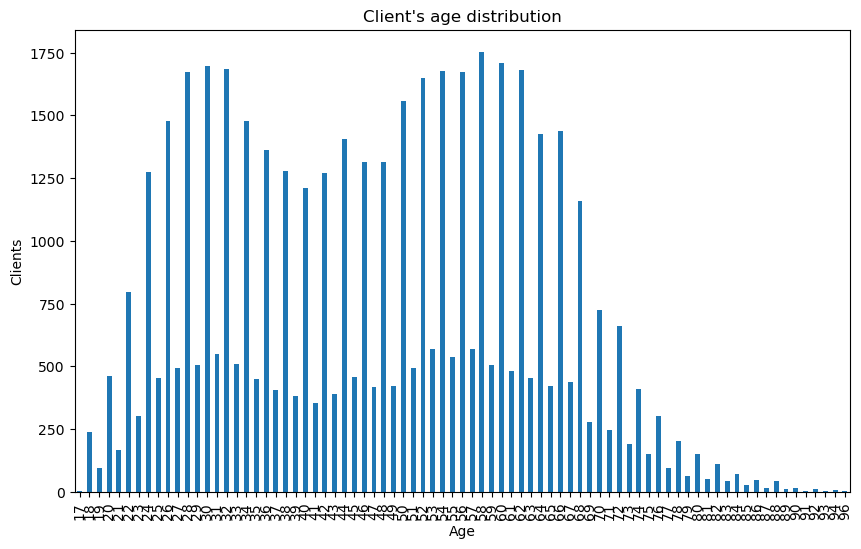

In [43]:
# Supongamos que tu DataFrame tiene una columna llamada 'edad'
df_clients_nd_nn_in['clnt_age'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))

# Añadir título y etiquetas
plt.title("Client's age distribution")
plt.xlabel('Age')
plt.ylabel('Clients')

# Mostrar el gráfico
plt.show()

### 2.1.7 Column gender

Check unique values

In [39]:
unique_genders = df_clients_nd_nn_in['gendr'].unique()
count_genders = df_clients_nd_nn_in['gendr'].value_counts()
print("\nValores únicos en la columna 'gendr':")
print(unique_genders)
print(count_genders)


Valores únicos en la columna 'gendr':
['U' 'M' 'F' 'X']
gendr
U    17266
M    16936
F    16252
X        2
Name: count, dtype: int64


Let's replace X by U in those 2 values with X gender. 

In [40]:
df_clients_nd_nn_in['gendr'] = df_clients_nd_nn_in['gendr'].replace('X', 'U')

### 2.1.8 Column num_accts

In [41]:
display(df_clients_nd_nn_in['num_accts'])
print(f"Valor mínimo: {df_clients_nd_nn_in['num_accts'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['num_accts'].max()}")

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
50495    3.0
50496    3.0
50497    2.0
50498    2.0
50499    3.0
Name: num_accts, Length: 50456, dtype: float64

Valor mínimo: 1.0
Valor máximo: 7.0


We change the column datatype:

In [42]:
df_clients_nd_nn_in['num_accts'].unique()

array([2., 5., 3., 4., 6., 7., 1.])

In [43]:
df_clients_nd_nn_in['num_accts'] = df_clients_nd_nn_in['num_accts'].astype(int)

In [44]:
df_clients_nd_nn_in['num_accts'].value_counts()

num_accts
2    39700
3     8937
4     1585
5      204
6       23
7        6
1        1
Name: count, dtype: int64

### 2.1.9 Column bal

In [45]:
display(df_clients_nd_nn_in['bal'])
print(f"Valor mínimo: {df_clients_nd_nn_in['bal'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['bal'].max()}")

0          45105.30
1         110860.30
2          52467.79
3          67454.65
4         103671.75
            ...    
50495     372100.59
50496    4279873.38
50497      44837.16
50498      44994.24
50499     209278.15
Name: bal, Length: 50456, dtype: float64

Valor mínimo: 23789.44
Valor máximo: 16320040.15


### 2.1.10 Column calls_6_month

In [46]:
display(df_clients_nd_nn_in['calls_6_mnth'])
print(f"Valor mínimo: {df_clients_nd_nn_in['calls_6_mnth'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['calls_6_mnth'].max()}")

0        6.0
1        6.0
2        6.0
3        3.0
4        0.0
        ... 
50495    6.0
50496    6.0
50497    2.0
50498    1.0
50499    0.0
Name: calls_6_mnth, Length: 50456, dtype: float64

Valor mínimo: 0.0
Valor máximo: 6.0


In [47]:
df_clients_nd_nn_in['calls_6_mnth'].value_counts()

calls_6_mnth
6.0    12215
1.0     7904
0.0     7727
2.0     7210
3.0     5850
4.0     4844
5.0     4706
Name: count, dtype: int64

Let's turn into int

In [48]:
df_clients_nd_nn_in['calls_6_mnth'] = df_clients_nd_nn_in['calls_6_mnth'].astype(int)

### 2.1.11 Column logons_6_mnth

In [49]:
display(df_clients_nd_nn_in['logons_6_mnth'])
print(f"Valor mínimo: {df_clients_nd_nn_in['logons_6_mnth'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['logons_6_mnth'].max()}")

0        9.0
1        9.0
2        9.0
3        6.0
4        3.0
        ... 
50495    9.0
50496    9.0
50497    5.0
50498    4.0
50499    3.0
Name: logons_6_mnth, Length: 50456, dtype: float64

Valor mínimo: 3.0
Valor máximo: 9.0


In [50]:
df_clients_nd_nn_in['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12340
4.0     7851
3.0     7306
5.0     7278
6.0     5962
7.0     4910
8.0     4809
Name: count, dtype: int64

In [51]:
df_clients_nd_nn_in['logons_6_mnth'] = df_clients_nd_nn_in['logons_6_mnth'].astype(int)

### 2.1.12 Restart the index

In [52]:
df_clients_nd_nn_in = df_clients_nd_nn_in.reset_index(drop=True)

## 2.2 Cleaning Footprints Table

### 2.2.1 Duplicates

In [53]:
# Let's check how many duplicated rows there are.
duplicates = df_footprint.duplicated(keep=False)
df_duplicates = df_footprint[duplicates]

print(df_duplicates)

        client_id             visitor_id                      visit_id  \
364       9358626  148475529_63668223960  223297395_36250329195_832161   
365       9358626  148475529_63668223960  223297395_36250329195_832161   
367       5376894  622509328_44408201172  688984457_43441834354_912755   
368       5376894  622509328_44408201172  688984457_43441834354_912755   
382        438567  923318467_50708963627  330543236_29863358529_771432   
...           ...                    ...                           ...   
412165    4408245   14058946_73585431797  994148957_84373994761_991865   
412166    4408245   14058946_73585431797  994148957_84373994761_991865   
412167    4408245   14058946_73585431797  994148957_84373994761_991865   
412216    3897324   80177429_24869309091  149796456_64325617570_112561   
412217    3897324   80177429_24869309091  149796456_64325617570_112561   

       process_step            date_time  
364           start  2017-04-28 12:27:28  
365           start  2017

In [54]:
# Deleting all duplicates
df_footprint_nd = df_footprint.drop_duplicates(keep=False)

print(df_footprint_nd)

        client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
412259    9668240   388766751_9038881013   922267647_3096648104_968866   
412260    9668240   388766751_9038881013   922267647_3096648104_968866   
412261    9668240   388766751_9038881013   922267647_3096648104_968866   
412262    9668240   388766751_9038881013   922267647_3096648104_968866   
412263     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017

### 2.2.2 Dropping Ip's column

In [55]:
df_footprint_nd_nc = df_footprint_nd.drop(['visitor_id', 'visit_id'], axis=1)

### 2.2.2 Drop Clients not in experiment

In [56]:
#create list of client_ids: 
clients_list = list(df_clients_nd_nn_in['client_id'])

Because we need to put an eye only in the clients who we know are in the experiment (so, the list of clients in df_clients), we are deleting the rest of clients. 

In [57]:
#creating new dataframe with footprints only with clients from clients list
df_sample_fp = df_footprint_nd_nc.loc[df_footprint_nd_nc['client_id'].isin(clients_list)]
df_sample_fp = df_sample_fp.reset_index(drop=True)
df_sample_fp

,client_id,process_step,date_time
0,9988021,step_3,2017-04-17 15:27:07
1,9988021,step_2,2017-04-17 15:26:51
2,9988021,step_3,2017-04-17 15:19:22
3,9988021,step_2,2017-04-17 15:19:13
4,9988021,step_3,2017-04-17 15:18:04
...,...,...,...
313899,1574008,start,2017-05-06 23:43:27
313900,2908510,start,2017-05-10 22:57:17
313901,2908510,step_2,2017-05-10 22:56:31
313902,2908510,step_1,2017-05-10 22:56:23


### 2.2.3 Nulls

Let's see now if we have nulls values

In [61]:
missing_data = df_sample_fp.isnull().sum()
print(missing_data)

client_id       0
process_step    0
date_time       0
dtype: int64


In [62]:
has_nan = df_sample_fp.isna().any().any()

if has_nan:
    print("El DataFrame contiene valores NaN.")
else:
    print("El DataFrame no contiene valores NaN.")

El DataFrame no contiene valores NaN.


### 2.2.4 Ordering and checking datatypes in columns

In [63]:
df_sample_fp

,client_id,process_step,date_time
0,9988021,step_3,2017-04-17 15:27:07
1,9988021,step_2,2017-04-17 15:26:51
2,9988021,step_3,2017-04-17 15:19:22
3,9988021,step_2,2017-04-17 15:19:13
4,9988021,step_3,2017-04-17 15:18:04
...,...,...,...
313899,1574008,start,2017-05-06 23:43:27
313900,2908510,start,2017-05-10 22:57:17
313901,2908510,step_2,2017-05-10 22:56:31
313902,2908510,step_1,2017-05-10 22:56:23


In [60]:
# Convertir la columna date_time a tipo datetime
df_sample_fp['date_time'] = pd.to_datetime(df_sample_fp['date_time'])

In [66]:
#Pivotar la tabla
df_pivot = df_sample_fp.pivot_table(index='client_id', columns='process_step', values='date_time', aggfunc='min')
# Mostrar el DataFrame transformado
print(df_pivot)


process_step             confirm               start              step_1  \
client_id                                                                  
555          2017-04-15 13:00:34 2017-04-15 12:57:56 2017-04-15 12:58:03   
647          2017-04-12 15:47:45 2017-04-12 15:41:28 2017-04-12 15:41:35   
934                          NaT 2017-04-18 02:36:30                 NaT   
1028                         NaT 2017-04-08 18:51:28 2017-04-08 18:52:17   
1104                         NaT 2017-06-12 07:49:18                 NaT   
...                          ...                 ...                 ...   
9999150                      NaT 2017-05-29 16:55:12 2017-05-29 16:55:18   
9999400      2017-04-20 05:23:27 2017-04-20 05:21:28 2017-04-20 05:21:50   
9999626                      NaT 2017-05-14 09:07:51 2017-05-14 09:07:59   
9999729      2017-05-08 16:09:40 2017-04-05 13:40:49 2017-04-05 13:41:04   
9999832                      NaT 2017-05-16 16:46:03 2017-05-16 16:46:11   

process_ste

In [67]:
# Ordenar las columnas según el orden del proceso web
ordered_columns = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_sample_fp_or = df_pivot[ordered_columns]

# Mostrar el DataFrame transformado y ordenado
print(df_sample_fp_or)

process_step               start              step_1              step_2  \
client_id                                                                  
555          2017-04-15 12:57:56 2017-04-15 12:58:03 2017-04-15 12:58:35   
647          2017-04-12 15:41:28 2017-04-12 15:41:35 2017-04-12 15:41:53   
934          2017-04-18 02:36:30                 NaT                 NaT   
1028         2017-04-08 18:51:28 2017-04-08 18:52:17 2017-04-08 18:53:29   
1104         2017-06-12 07:49:18                 NaT                 NaT   
...                          ...                 ...                 ...   
9999150      2017-05-29 16:55:12 2017-05-29 16:55:18                 NaT   
9999400      2017-04-20 05:21:28 2017-04-20 05:21:50 2017-04-20 05:22:17   
9999626      2017-05-14 09:07:51 2017-05-14 09:07:59                 NaT   
9999729      2017-04-05 13:40:49 2017-04-05 13:41:04 2017-04-20 14:27:36   
9999832      2017-05-16 16:46:03 2017-05-16 16:46:11                 NaT   

process_ste

In [68]:
df_pivot = df_pivot.reset_index()
# df_footprint_nd_nc

In [70]:
#creating new dataframe with footprints only with clients from clients list
df_pivot = df_pivot.loc[df_pivot['client_id'].isin(clients_list)]

df_pivot.shape

(50196, 6)

Now we are going to check if all clients_id from fp are in users, and all users in fp.

Because we need to put an eye only in the clients who we know are in the experiment (so, the list of clients in df_clients), we are deleting the rest of clients. 

In [71]:
#create list of client_ids: 
clients_list2 = list(df_pivot['client_id'])

In [75]:
df_clients_nd_nn_in_2 = df_clients_nd_nn_in.loc[df_clients_nd_nn_in['client_id'].isin(clients_list2)]
df_clients_nd_nn_in_2 = df_clients_nd_nn_in_2.reset_index(drop=True)

In [79]:
df_clients_nd_nn_in_2['client_id'].unique()

array([ 836976, 2304905, 1439522, ..., 5826160, 8739285, 7468138],
      dtype=int64)

In [80]:
df_pivot['client_id'].unique()

array([    555,     647,     934, ..., 9999626, 9999729, 9999832],
      dtype=int64)

In [67]:
df_merged = pd.merge(df_pivot, df_clients_nd_nn_in[['client_id', 'variation']], on='client_id', how='left')

print(df_merged)

       client_id               start              step_1              step_2  \
0            555 2017-04-15 12:57:56 2017-04-15 12:58:03 2017-04-15 12:58:35   
1            647 2017-04-12 15:41:28 2017-04-12 15:41:35 2017-04-12 15:41:53   
2            934 2017-04-18 02:36:30                 NaT                 NaT   
3           1028 2017-04-08 18:51:28 2017-04-08 18:52:17 2017-04-08 18:53:29   
4           1104 2017-06-12 07:49:18                 NaT                 NaT   
...          ...                 ...                 ...                 ...   
50191    9999150 2017-05-29 16:55:12 2017-05-29 16:55:18                 NaT   
50192    9999400 2017-04-20 05:21:28 2017-04-20 05:21:50 2017-04-20 05:22:17   
50193    9999626 2017-05-14 09:07:51 2017-05-14 09:07:59                 NaT   
50194    9999729 2017-04-05 13:40:49 2017-04-05 13:41:04 2017-04-20 14:27:36   
50195    9999832 2017-05-16 16:46:03 2017-05-16 16:46:11                 NaT   

                   step_3             c

In [68]:
df_merged = df_merged.reset_index()

# 3. Exporting our cleaned dataframes

Rename dataframes for easy exportation

In [69]:
df_clean_users = df_clients_nd_nn_in
df_clean_fp = df_merged

Exportation to CSV

In [70]:
df_clean_fp.to_csv('../clean_data/df_clean_fp.csv', index=False)
df_clean_users.to_csv('../clean_data/df_clean_users.csv', index=False)

# 4. Who are ours Clients

## 4.1 Primary Clients

### 4.1.1 By Gender

In [71]:
df_clean_users.groupby(['gendr'])['client_id'].count()

gendr
F    16252
M    16936
U    17268
Name: client_id, dtype: int64

<Axes: xlabel='gendr', ylabel='Count'>

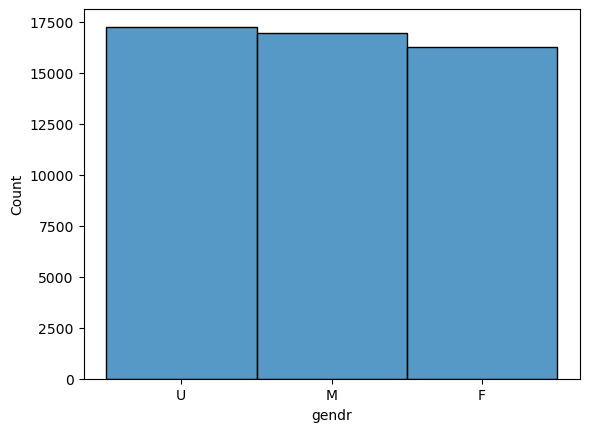

In [72]:
sns.histplot(df_clean_users, x="gendr")

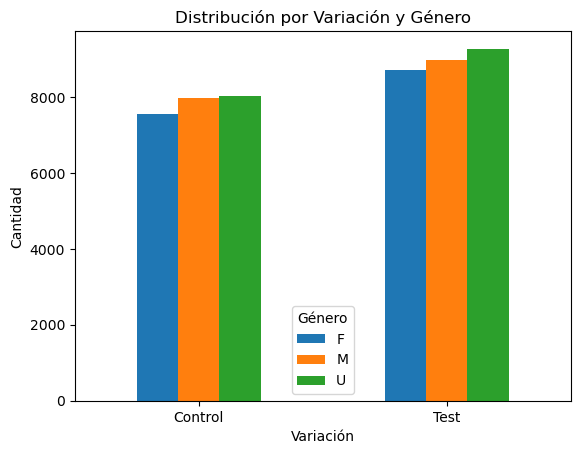

In [73]:
# Crear el DataFrame a partir de tu estructura
data_gender = {
    ('Control', 'F'): 7543,
    ('Control', 'M'): 7970,
    ('Control', 'U'): 8014,
    ('Test', 'F'): 8716,
    ('Test', 'M'): 8977,
    ('Test', 'U'): 9268
}

# Convertir el diccionario en un DataFrame con MultiIndex
df_gender = pd.Series(data_gender).unstack()

# Hacer el gráfico de barras
df_gender.plot(kind='bar')

# Configurar etiquetas y título
plt.title('Distribución por Variación y Género')
plt.xlabel('Variación')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.xticks(rotation=0)

# Mostrar gráfico
plt.show()

### 4.1.2 Clients by Tenure

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

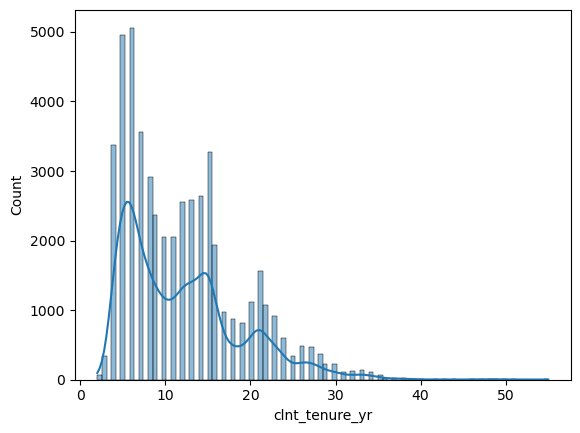

In [74]:
plt.figure()
#sns.histplot(df_sample_client, x="clnt_tenure_yr")
#kde keyword adds a line that represents the shape of the histogram
sns.histplot(df_clean_users, x="clnt_tenure_yr",kde=True)
#plt.figure(figsize=(10,10))

### 4.1.3 Clients by Age

<Axes: xlabel='clnt_age', ylabel='Count'>

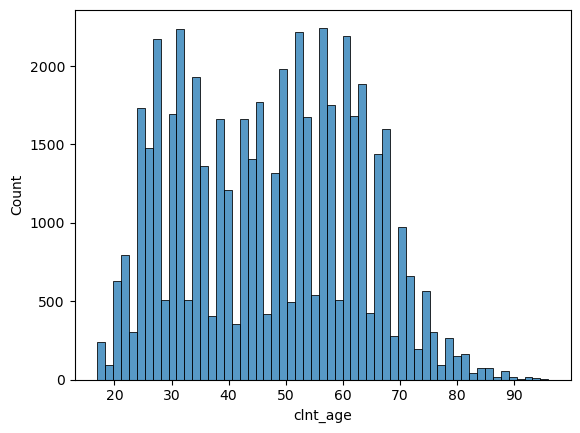

In [75]:
sns.histplot(df_clean_users, x="clnt_age")

### 4.1.4 Clients by owned accounts

In [76]:
df_clean_users.groupby(['num_accts'])['client_id'].count()

num_accts
1        1
2    39700
3     8937
4     1585
5      204
6       23
7        6
Name: client_id, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

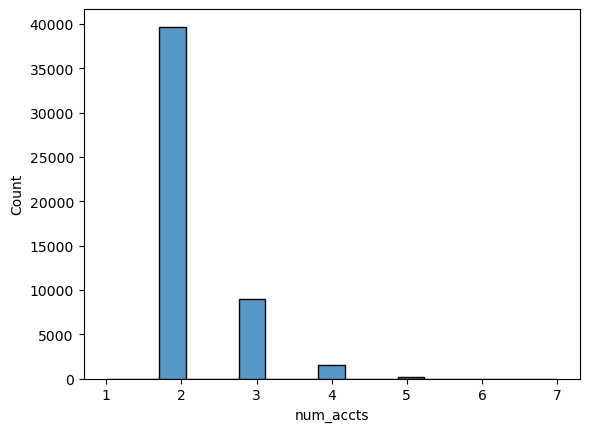

In [77]:
sns.histplot(df_clean_users, x="num_accts")

### 4.1.5 Clients by bal

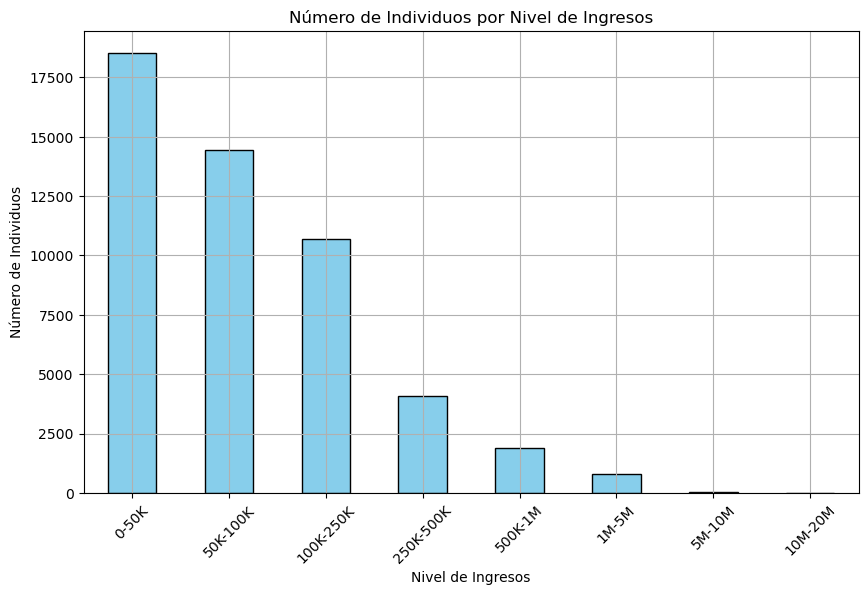

In [78]:
# Definir los límites de los grupos de ingresos
bins = [0, 50000, 100000, 250000, 500000, 1000000, 5000000, 10000000, 20000000]
labels = ['0-50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '1M-5M', '5M-10M', '10M-20M']

# Crear una nueva columna con los grupos de ingresos
df_clean_users['full_bal'] = pd.cut(df_clean_users['bal'], bins=bins, labels=labels)

# Contar cuántos individuos hay en cada grupo
income_group_counts = df_clean_users['full_bal'].value_counts().sort_index()

# Graficar el número de individuos en cada grupo
plt.figure(figsize=(10, 6))
income_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Individuos por Nivel de Ingresos')
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4.1.6 Clients by calls_6_mnth

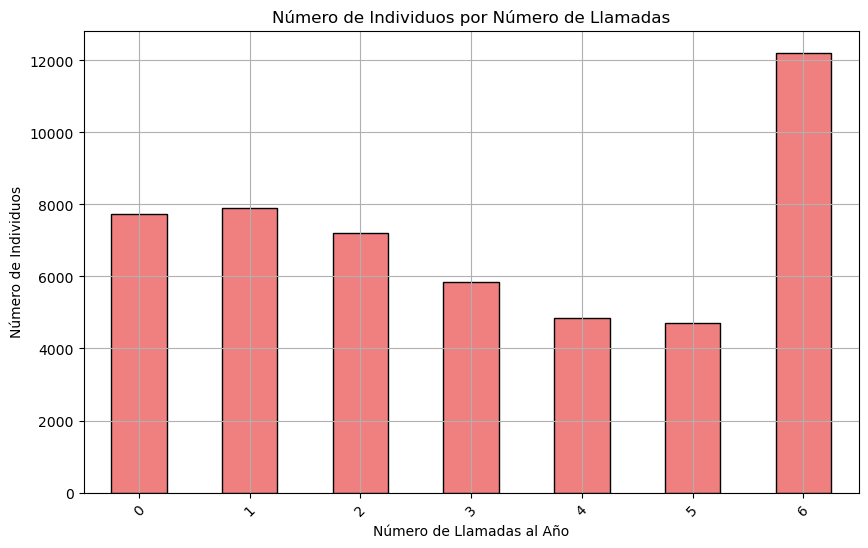

In [79]:
# Definir los límites de los grupos de llamadas
call_bins = [-1, 0, 1, 2, 3, 4, 5, 6]
call_labels = ['0','1', '2', '3', '4', '5', '6']

# Crear una nueva columna con los grupos de llamadas
df_clean_users['call_group'] = pd.cut(df_clean_users['calls_6_mnth'], bins=call_bins, labels=call_labels)

# Contar cuántos individuos hay en cada grupo de llamadas
call_group_counts = df_clean_users['call_group'].value_counts().sort_index()

# Graficar el número de individuos por grupo de llamadas
plt.figure(figsize=(10, 6))
call_group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Número de Individuos por Número de Llamadas')
plt.xlabel('Número de Llamadas al Año')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4.1.7 Clients by logons_6_mnth

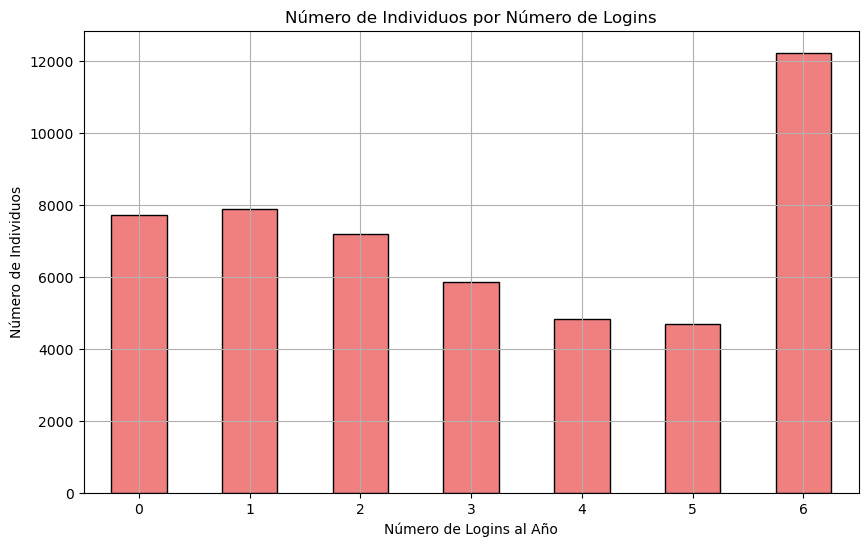

In [80]:
logins_group_counts = df_clean_users['logons_6_mnth'].value_counts().sort_index()

# Graficar el número de individuos por grupo de llamadas
plt.figure(figsize=(10, 6))
call_group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Número de Individuos por Número de Logins')
plt.xlabel('Número de Logins al Año')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### 4.1.8 Client by Variation used

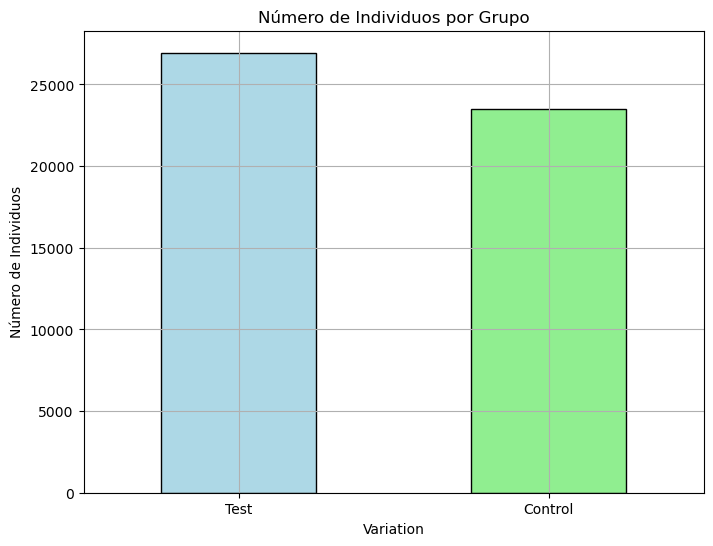

In [81]:
group_counts = df_clean_users['variation'].value_counts()
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title('Número de Individuos por Grupo')
plt.xlabel('Variation')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

explicacion kde

La opción kde=True en sns.histplot de Seaborn añade una estimación de densidad kernel (Kernel Density Estimate, KDE) al gráfico de histograma. En lugar de solo mostrar las barras del histograma, que representan la frecuencia de los datos en cada bin, la curva KDE te da una representación suave de la distribución de los datos.

¿Qué es la estimación de densidad kernel (KDE)?
La KDE es una forma de estimar la función de densidad de probabilidad de una variable continua. En lugar de contar los datos en intervalos discretos como en un histograma, la KDE usa una función kernel (una curva suave, normalmente una gaussiana) para aproximar cómo se distribuyen los datos en el conjunto. La KDE intenta proporcionar una mejor visualización de la distribución de los datos que un histograma por sí solo, especialmente útil para datos continuos.
¿Cuándo usar KDE?
Datos continuos: La KDE es más adecuada para datos continuos donde la distribución es más fluida.
Suavidad: Es útil cuando quieres visualizar una versión suavizada del histograma, especialmente si los datos tienen picos y valles que podrían suavizarse con la curva.
Tamaño de muestra pequeño: Si tienes pocos datos, un histograma puede dar una imagen errónea de la distribución real. La KDE ayuda a suavizar la representación.
En resumen, kde=True añade una curva que representa la distribución subyacente de los datos de forma suave, complementando el histograma para dar una mejor idea de la distribución.

## 4.2 Cross EDA

### 4.2.1 Promedio de llamadas y logins en función de Bal

In [82]:
# Definición de grupos de edad
age_bins = [0, 30, 45, 60, 100]
age_labels = ['Joven', 'Adulto', 'Mayor', 'Anciano']
df_clean_users['age_group'] = pd.cut(df_clean_users['clnt_age'], bins=age_bins, labels=age_labels)

# Calcular la tenencia promedio de cuentas por grupo de edad
avg_accounts_by_age_group = df_clean_users.groupby('age_group')['num_accts'].mean()
print(avg_accounts_by_age_group)

# Definir grupos de clientes: Nuevos vs. Antiguos
df_clean_users['client_status'] = np.where(df_clean_users['clnt_tenure_yr'] < 5, 'Nuevos', 'Antiguos')

# Calcular estadísticas para cada grupo
client_analysis = df_clean_users.groupby('client_status').agg({
    'bal': 'mean',               # Saldo promedio
    'calls_6_mnth': 'mean',      # Llamadas promedio en 6 meses
    'logons_6_mnth': 'mean',     # Inicios de sesión promedio en 6 meses
    'num_accts': 'mean'          # Número promedio de cuentas
}).reset_index()

# Mostrar resultados
print(client_analysis)

age_group
Joven      2.266252
Adulto     2.265100
Mayor      2.253216
Anciano    2.234102
Name: num_accts, dtype: float64
  client_status            bal  calls_6_mnth  logons_6_mnth  num_accts
0      Antiguos  154530.449370      3.101523       6.140320   2.257825
1        Nuevos   87489.748859      2.990204       6.026476   2.213132


C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\1355302223.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_accounts_by_age_group = df_clean_users.groupby('age_group')['num_accts'].mean()


In [83]:
demographics_balance = df_clean_users.groupby(['clnt_age', 'gendr'])['bal'].describe()
demographics_balance

count           mean            std        min          25%  \
clnt_age gendr                                                                
17       M        1.0   28804.770000            NaN   28804.77   28804.7700   
         U        2.0   36639.735000    1896.806869   35298.49   35969.1125   
18       F       28.0   54710.743571   83558.806682   25747.03   29083.2150   
         M       48.0   39230.740208   14951.868507   24837.54   29035.1300   
         U      163.0   41027.978773   34883.483264   24013.94   27609.2450   
...               ...            ...            ...        ...          ...   
94       M        2.0  944058.245000  595098.189122  523260.28  733659.2625   
         U        5.0  268770.176000  384426.736471   51658.04   58162.7700   
96       F        1.0   43471.960000            NaN   43471.96   43471.9600   
         M        1.0   36297.660000            NaN   36297.66   36297.6600   
         U        1.0   94240.290000            NaN   94240.29   94240.2900   

                       50%           75%         max  
clnt_age gendr                                        
17       M       28804.770  2.880477e+04    28804.77  
         U       36639.735  3.731036e+04    37980.98  
18       F       34112.750  4.259379e+04   472893.29  
         M       33052.770  4.438455e+04    80880.63  
         U       32691.850  3.960165e+04   360777.78  
...                    ...           ...         ...  
94       M      944058.245  1.154457e+06  1364856.21  
         U      108825.590  1.744105e+05   950793.99  
96       F       43471.960  4.347196e+04    43471.96  
         M       36297.660  3.629766e+04    36297.66  
         U       94240.290  9.424029e+04    94240.29  

[235 rows x 8 columns]

c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


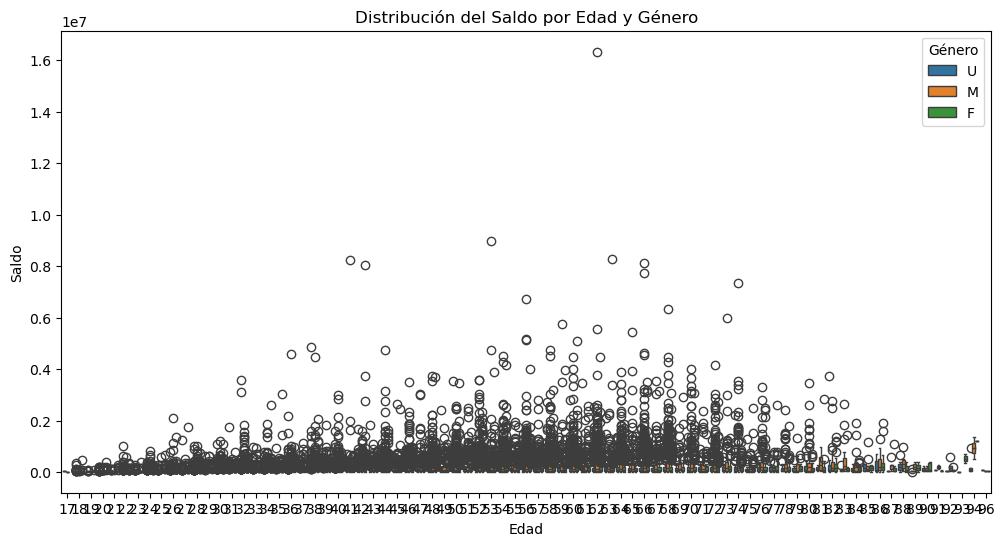

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean_users, x='clnt_age', y='bal', hue='gendr')
plt.title('Distribución del Saldo por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.legend(title='Género')
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\225575166.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_age_group = df_clean_users.groupby('age_group')['bal'].mean().reset_index()


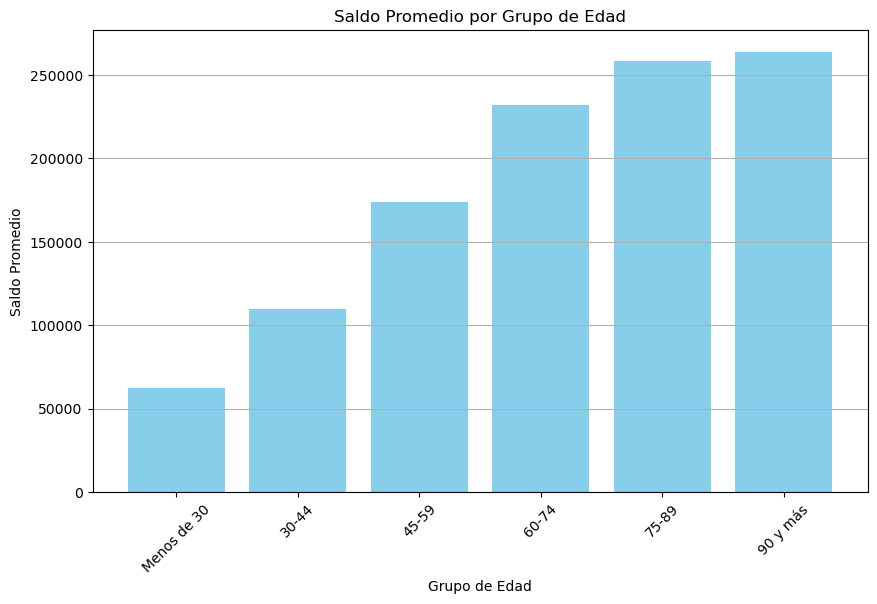

In [85]:
# Paso 1: Crear grupos de edad
age_bins = [0, 30, 45, 60, 75, 90, 100]  
age_labels = ['Menos de 30', '30-44', '45-59', '60-74', '75-89', '90 y más']
df_clean_users['age_group'] = pd.cut(df_clean_users['clnt_age'], bins=age_bins, labels=age_labels)

# Paso 2: Calcular el saldo promedio por grupo de edad
avg_balance_by_age_group = df_clean_users.groupby('age_group')['bal'].mean().reset_index()

# Paso 3: Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(avg_balance_by_age_group['age_group'], avg_balance_by_age_group['bal'], color='skyblue')
plt.title('Saldo Promedio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Saldo Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

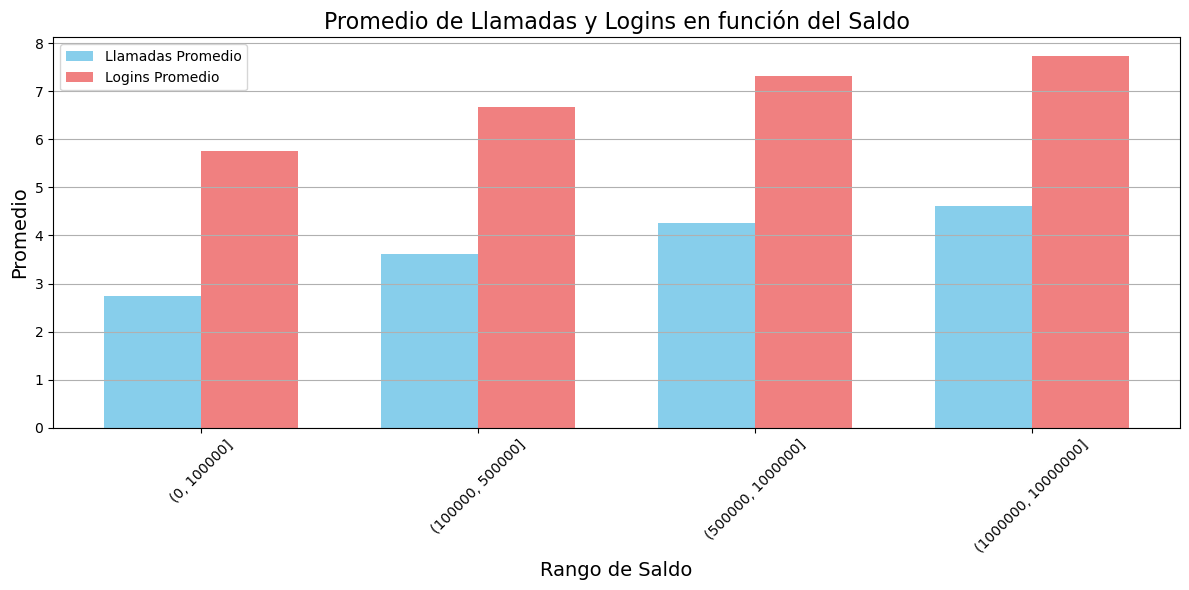

In [86]:
call_login_analysis = pd.DataFrame({
    'calls_6_mnth': [2.732145, 3.624848, 4.261202, 4.614339],
    'logons_6_mnth': [5.764751, 6.672235, 7.324590, 7.736712]
}, index=pd.Index(['(0, 100000]', '(100000, 500000]', '(500000, 1000000]', '(1000000, 10000000]'], name='bal'))

# Reiniciar el índice para facilitar el uso
call_login_analysis.reset_index(inplace=True)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras
bar_width = 0.35  # ancho de las barras
x = range(len(call_login_analysis))

# Barras de llamadas promedio
plt.bar(x, call_login_analysis['calls_6_mnth'], width=bar_width, color='skyblue', label='Llamadas Promedio')

# Barras de logins promedio, desplazadas a la derecha
plt.bar([p + bar_width for p in x], call_login_analysis['logons_6_mnth'], width=bar_width, color='lightcoral', label='Logins Promedio')

# Configuración de ejes
plt.title('Promedio de Llamadas y Logins en función del Saldo', fontsize=16)
plt.xlabel('Rango de Saldo', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], call_login_analysis['bal'], rotation=45)  # Ajustar las etiquetas en el eje x
plt.legend()

# Mostrar el gráfico
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 4.2.2. Correlación entre Edad y N de cuentas

In [87]:
correlation_age_accounts = df_clean_users['clnt_age'].corr(df_clean_users['num_accts'])
print("Correlación entre Edad y Número de Cuentas:", correlation_age_accounts)

Correlación entre Edad y Número de Cuentas: -0.02210563572786464


# 5. Convertions

## 5.1 Preparation

In [88]:
df_clean_fp.shape

(50196, 8)

In [89]:
df_clean_users.shape

(50456, 14)

We have to equal the list of clients we sampled. In this case, there is a difference between fp and users tables, so let's go to fix it.

In [90]:
#create list of client_ids: 
clients_list2 = list(df_clean_fp['client_id'])
clients_list2

[555,
 647,
 934,
 1028,
 1104,
 1186,
 1195,
 1197,
 1336,
 1346,
 1368,
 1516,
 1643,
 1702,
 1755,
 1836,
 1936,
 2439,
 2581,
 2720,
 3232,
 3572,
 3647,
 3743,
 4369,
 4484,
 4603,
 4717,
 4870,
 5354,
 5845,
 6022,
 6150,
 6642,
 6904,
 6977,
 6985,
 7020,
 7561,
 7563,
 7567,
 7657,
 7723,
 7934,
 8023,
 8039,
 8055,
 8101,
 8124,
 8610,
 8712,
 8820,
 9229,
 9751,
 9767,
 9845,
 9916,
 10344,
 10363,
 11040,
 11054,
 11070,
 11122,
 11309,
 11880,
 12045,
 12785,
 13009,
 13735,
 13831,
 14690,
 14775,
 15050,
 15189,
 15753,
 15807,
 16095,
 16098,
 16135,
 16202,
 16295,
 16549,
 16679,
 16744,
 16747,
 16881,
 17008,
 17036,
 17160,
 17170,
 17318,
 17404,
 18549,
 18660,
 18973,
 19060,
 19613,
 19782,
 19813,
 19832,
 20091,
 20185,
 20537,
 20564,
 20643,
 20668,
 20898,
 21200,
 21242,
 21281,
 21353,
 21403,
 21498,
 21522,
 21596,
 21719,
 21940,
 21970,
 22007,
 22793,
 22885,
 23276,
 23864,
 23914,
 24079,
 24443,
 24572,
 24703,
 24710,
 24841,
 25022,
 25026,
 250

In [91]:
#creating new dataframe with footprints only with clients from clients list
df_clean_users = df_clean_users.loc[df_clean_users['client_id'].isin(clients_list2)]

df_clean_users.shape

(50196, 14)

In [92]:
df_clean_users = df_clean_users.reset_index(drop=True)

## 5.2 Conversion rates

In [93]:
# Cargar el dataframe (reemplaza 'tu_archivo.csv' con el nombre de tu archivo)
df = pd.read_csv('../clean_data/df_clean_fp.csv', parse_dates=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Filtrar los clientes que han completado todos los pasos
completed_process = df.dropna(subset=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Calcular el número total de clientes
total_clients = len(df)

# Calcular el número de clientes que han completado el proceso
completed_clients = len(completed_process)

# Calcular el ratio de clientes que han completado el proceso
completion_ratio = completed_clients / total_clients

print(f"Total de clientes: {total_clients}")
print(f"Clientes que han completado el proceso: {completed_clients}")
print(f"Ratio de clientes que han completado el proceso: {completion_ratio:.2%}")

Total de clientes: 50196
Clientes que han completado el proceso: 32985
Ratio de clientes que han completado el proceso: 65.71%


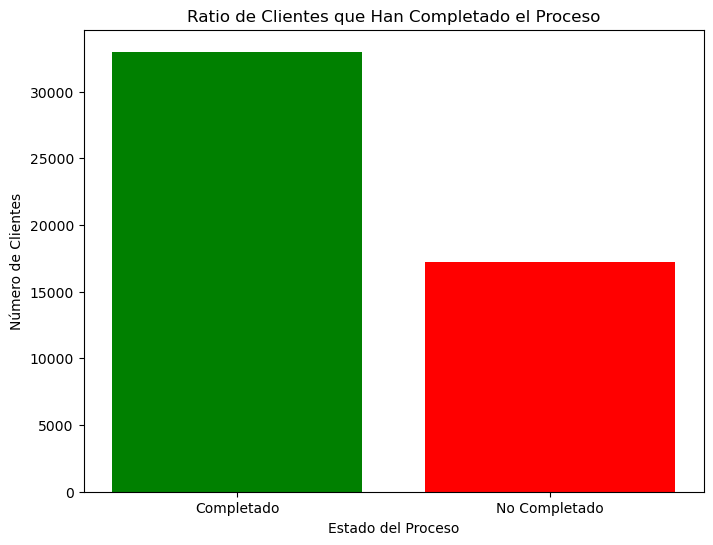

In [94]:
# Calcular el número de clientes que no han completado el proceso
incomplete_clients = total_clients - completed_clients

# Datos para el gráfico
labels = ['Completado', 'No Completado']
values = [completed_clients, incomplete_clients]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Estado del Proceso')
plt.ylabel('Número de Clientes')
plt.title('Ratio de Clientes que Han Completado el Proceso')
plt.show()

In [95]:
df_clean_fp

,index,client_id,start,step_1,step_2,step_3,confirm,variation
0,0,555,2017-04-15 12:57:56,2017-04-15 12:58:03,2017-04-15 12:58:35,2017-04-15 13:00:14,2017-04-15 13:00:34,Test
1,1,647,2017-04-12 15:41:28,2017-04-12 15:41:35,2017-04-12 15:41:53,2017-04-12 15:45:02,2017-04-12 15:47:45,Test
2,2,934,2017-04-18 02:36:30,NaT,NaT,NaT,NaT,Test
3,3,1028,2017-04-08 18:51:28,2017-04-08 18:52:17,2017-04-08 18:53:29,2017-04-08 18:58:04,NaT,Control
4,4,1104,2017-06-12 07:49:18,NaT,NaT,NaT,NaT,Control
...,...,...,...,...,...,...,...,...
50191,50191,9999150,2017-05-29 16:55:12,2017-05-29 16:55:18,NaT,NaT,NaT,Test
50192,50192,9999400,2017-04-20 05:21:28,2017-04-20 05:21:50,2017-04-20 05:22:17,2017-04-20 05:23:03,2017-04-20 05:23:27,Test
50193,50193,9999626,2017-05-14 09:07:51,2017-05-14 09:07:59,NaT,NaT,NaT,Test
50194,50194,9999729,2017-04-05 13:40:49,2017-04-05 13:41:04,2017-04-20 14:27:36,2017-05-08 16:09:19,2017-05-08 16:09:40,Test


In [96]:
# Filtrar las filas donde confirm no es NaT
df['is_conversion'] = df['confirm'].notna()

# Agrupar por variation y calcular el ratio de conversión
conversion_stats = df.groupby('variation').agg(
    total=('client_id', 'size'),
    conversions=('is_conversion', 'sum')
)

# Calcular el ratio de conversión
conversion_stats['conversion_rate'] = conversion_stats['conversions'] / conversion_stats['total']

# Mostrar los resultados
print(conversion_stats[['conversions', 'total', 'conversion_rate']])

           conversions  total  conversion_rate
variation                                     
Control          15401  23307         0.660789
Test             18663  26889         0.694076


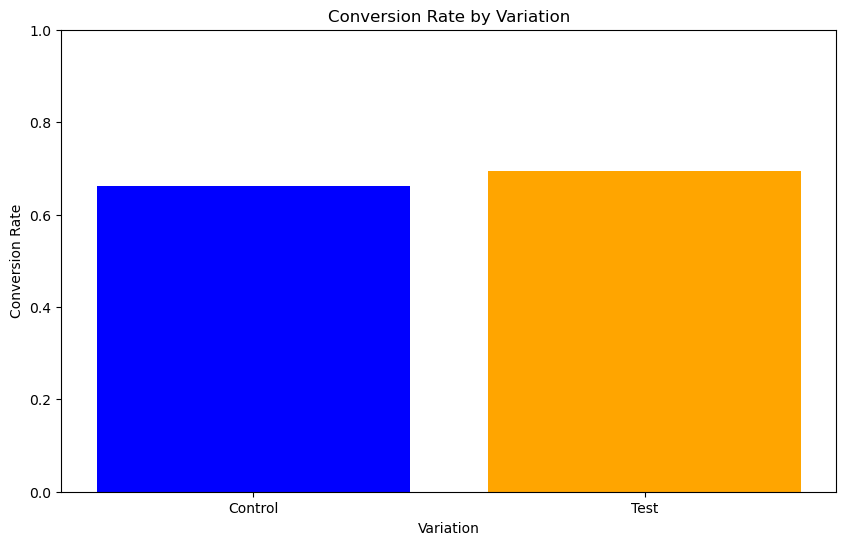

In [97]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(conversion_stats.index, conversion_stats['conversion_rate'], color=['blue', 'orange'])
plt.xlabel('Variation')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Variation')
plt.ylim(0, 1)  # Asegurarse de que el eje y va de 0 a 1
plt.show()

# 6. Errors

In [103]:
# Asegúrate de que df_clean_fp esté cargado
df_clean_fp = pd.read_csv('../clean_data/df_clean_fp.csv')

# Convertir las columnas a formato de fecha, excepto 'client_id' y 'variation'
date_columns = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
for col in date_columns:
    df_clean_fp[col] = pd.to_datetime(df_clean_fp[col], errors='coerce')

# Verificar que las columnas se hayan convertido correctamente
print(df_clean_fp.dtypes)

index                 int64
client_id             int64
start        datetime64[ns]
step_1       datetime64[ns]
step_2       datetime64[ns]
step_3       datetime64[ns]
confirm      datetime64[ns]
variation            object
dtype: object


C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\1343740188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_clients['time_to_step_1'] = (completed_clients['step_1'] - completed_clients['start']).dt.total_seconds() / 60  # en minutos
C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\1343740188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_clients['time_to_step_2'] = (completed_clients['step_2'] - completed_clients['step_1']).dt.total_seconds() / 60
C:\Users\Carlos\AppData\Loc

Tiempo promedio de start a step_1: 1495.96 minutos
Tiempo promedio de step_1 a step_2: 694.08 minutos
Tiempo promedio de step_2 a step_3: 827.46 minutos
Tiempo promedio de step_3 a confirm: 1359.81 minutos


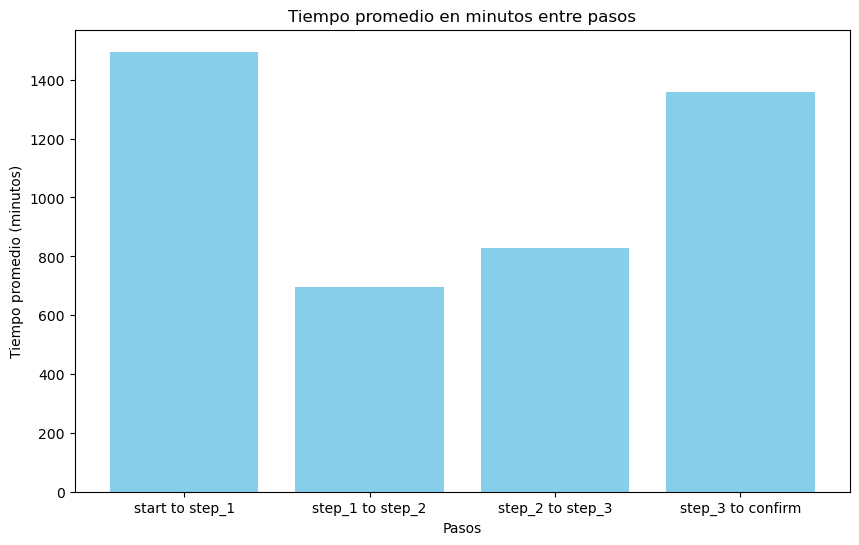

In [106]:
# Asegúrate de que df_clean_fp esté cargado y limpio
df_clean_fp = pd.read_csv('../clean_data/df_clean_fp.csv', parse_dates=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Filtrar clientes que han completado todos los pasos en el orden correcto
completed_clients = df_clean_fp.dropna(subset=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Calcular el tiempo entre cada paso
completed_clients['time_to_step_1'] = (completed_clients['step_1'] - completed_clients['start']).dt.total_seconds() / 60  # en minutos
completed_clients['time_to_step_2'] = (completed_clients['step_2'] - completed_clients['step_1']).dt.total_seconds() / 60
completed_clients['time_to_step_3'] = (completed_clients['step_3'] - completed_clients['step_2']).dt.total_seconds() / 60
completed_clients['time_to_confirm'] = (completed_clients['confirm'] - completed_clients['step_3']).dt.total_seconds() / 60

# Calcular el tiempo promedio entre cada paso
average_time_to_step_1 = completed_clients['time_to_step_1'].mean()
average_time_to_step_2 = completed_clients['time_to_step_2'].mean()
average_time_to_step_3 = completed_clients['time_to_step_3'].mean()
average_time_to_confirm = completed_clients['time_to_confirm'].mean()

# Mostrar los resultados
print(f"Tiempo promedio de start a step_1: {average_time_to_step_1:.2f} minutos")
print(f"Tiempo promedio de step_1 a step_2: {average_time_to_step_2:.2f} minutos")
print(f"Tiempo promedio de step_2 a step_3: {average_time_to_step_3:.2f} minutos")
print(f"Tiempo promedio de step_3 a confirm: {average_time_to_confirm:.2f} minutos")

# Graficar los resultados
average_times = [average_time_to_step_1, average_time_to_step_2, average_time_to_step_3, average_time_to_confirm]
steps = ['start to step_1', 'step_1 to step_2', 'step_2 to step_3', 'step_3 to confirm']

plt.figure(figsize=(10, 6))
plt.bar(steps, average_times, color='skyblue')
plt.title('Tiempo promedio en minutos entre pasos')
plt.ylabel('Tiempo promedio (minutos)')
plt.xlabel('Pasos')
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\1169918712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_clients['error'] = 0


Clientes con errores de retroceso: 137
Clientes sin errores de retroceso: 32848


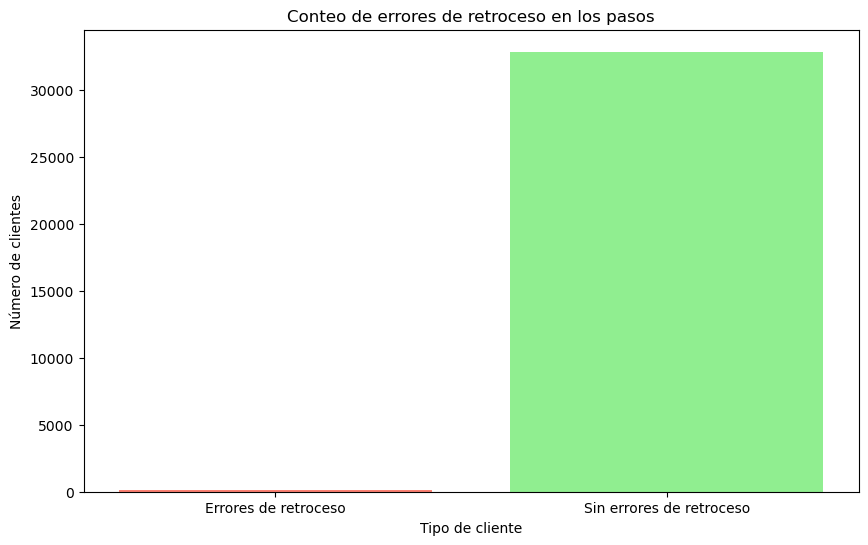

In [108]:
# Identificar y contar errores de ir hacia atrás en los pasos
completed_clients['error'] = 0

# Verificar si algún cliente va de un paso al anterior
completed_clients.loc[completed_clients['step_1'] < completed_clients['start'], 'error'] = 1
completed_clients.loc[completed_clients['step_2'] < completed_clients['step_1'], 'error'] = 1
completed_clients.loc[completed_clients['step_3'] < completed_clients['step_2'], 'error'] = 1
completed_clients.loc[completed_clients['confirm'] < completed_clients['step_3'], 'error'] = 1

# Contar los errores
error_counts = completed_clients['error'].sum()
no_error_counts = len(completed_clients) - error_counts

# Imprimir resultados
print(f"Clientes con errores de retroceso: {error_counts}")
print(f"Clientes sin errores de retroceso: {no_error_counts}")

# Graficar el conteo de errores
error_labels = ['Errores de retroceso', 'Sin errores de retroceso']
error_values = [error_counts, no_error_counts]

plt.figure(figsize=(10, 6))
plt.bar(error_labels, error_values, color=['salmon', 'lightgreen'])
plt.title('Conteo de errores de retroceso en los pasos')
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de cliente')
plt.show()

Total de clientes que no han completado todos los pasos: 17211
<class 'pandas.core.frame.DataFrame'>
Index: 17211 entries, 2 to 50195
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      17211 non-null  int64         
 1   client_id  17211 non-null  int64         
 2   start      16036 non-null  datetime64[ns]
 3   step_1     11381 non-null  datetime64[ns]
 4   step_2     7873 non-null   datetime64[ns]
 5   step_3     5266 non-null   datetime64[ns]
 6   confirm    1079 non-null   datetime64[ns]
 7   variation  17211 non-null  object        
dtypes: datetime64[ns](5), int64(2), object(1)
memory usage: 1.2+ MB
None


C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\699461133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_clients['incomplete_step'] = incomplete_clients.apply(


variation        Control  Test
incomplete_step               
start                781   394
step_1              3112  2424
step_2              1443  1985
step_3              1239  1411
confirm             2006  2416


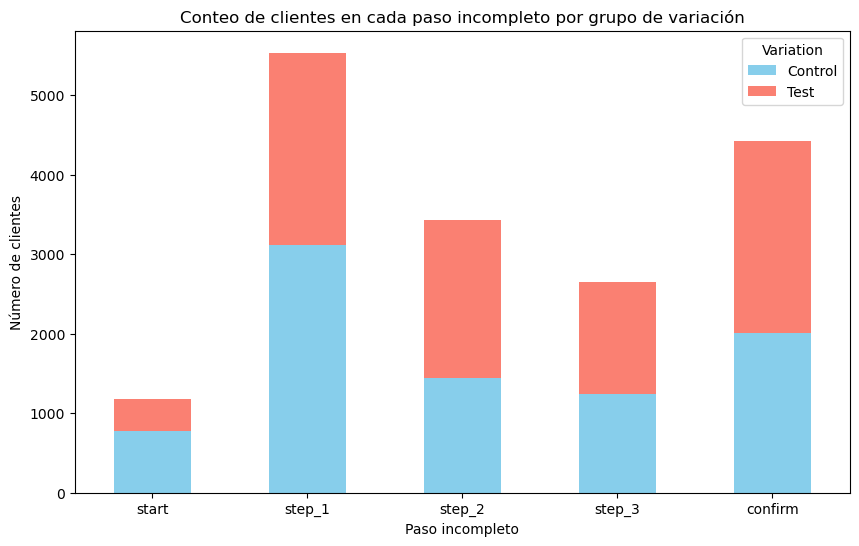

In [111]:
# Asegúrate de que df_clean_fp esté cargado y limpio
df_clean_fp = pd.read_csv('../clean_data/df_clean_fp.csv', parse_dates=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Filtrar clientes que no han completado todos los pasos
incomplete_clients = df_clean_fp[df_clean_fp.isnull().any(axis=1)]

# Mostrar información sobre los clientes que no han completado todos los pasos
print(f"Total de clientes que no han completado todos los pasos: {len(incomplete_clients)}")
print(incomplete_clients.info())

# Analizar en qué paso se quedaron los clientes
incomplete_clients['incomplete_step'] = incomplete_clients.apply(
    lambda row: 'start' if pd.isnull(row['start']) else
                'step_1' if pd.isnull(row['step_1']) else
                'step_2' if pd.isnull(row['step_2']) else
                'step_3' if pd.isnull(row['step_3']) else
                'confirm', axis=1
)

# Contar el número de clientes en cada paso incompleto, diferenciando por 'variation'
incomplete_step_counts = incomplete_clients.groupby(['incomplete_step', 'variation']).size().unstack(fill_value=0)

# Ordenar los pasos según el orden deseado
ordered_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
incomplete_step_counts = incomplete_step_counts.reindex(ordered_steps)

# Imprimir los resultados
print(incomplete_step_counts)

# Graficar el conteo de clientes en cada paso incompleto, diferenciando por 'variation'
incomplete_step_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Conteo de clientes en cada paso incompleto por grupo de variación')
plt.ylabel('Número de clientes')
plt.xlabel('Paso incompleto')
plt.xticks(rotation=0)  # Asegurar que las etiquetas del eje X estén bien alineadas
plt.legend(title='Variation')
plt.show()

Now, let's make a graphic about it.

# 7. Finding Outliers

C:\Users\Carlos\AppData\Local\Temp\ipykernel_20332\55035726.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, outliers_in_col])


Total de outliers encontrados: 6381
      client_id clnt_tenure_yr clnt_tenure_mnth clnt_age gendr num_accts  \
259     6815257             46              554       72     M         2   
336     9371037             32              395       68     M         3   
539     7236024             33              399       65     F         2   
631     4244298             32              388       66     F         2   
643     1088201             35              421       54     M         2   
...         ...            ...              ...      ...   ...       ...   
50414   7708199             13              158       68     M         2   
50435   1738333              7               90       68     U         2   
50445   6751438              8               98       50     U         2   
50451   1780858             21              262       68     M         3   
50452   6967120             21              260       68     M         3   

              bal calls_6_mnth logons_6_mnth variat

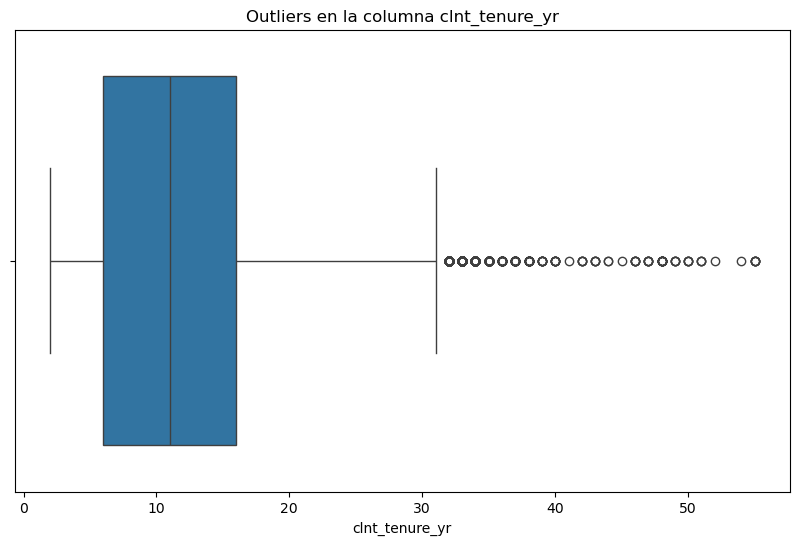

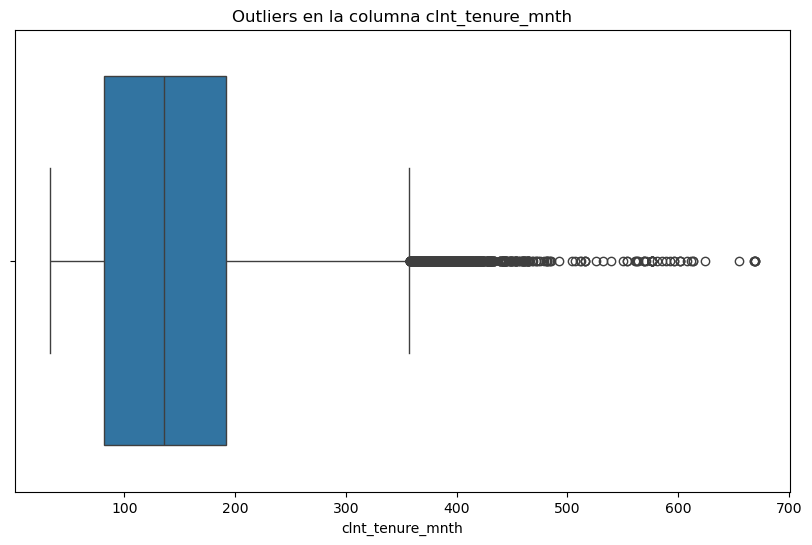

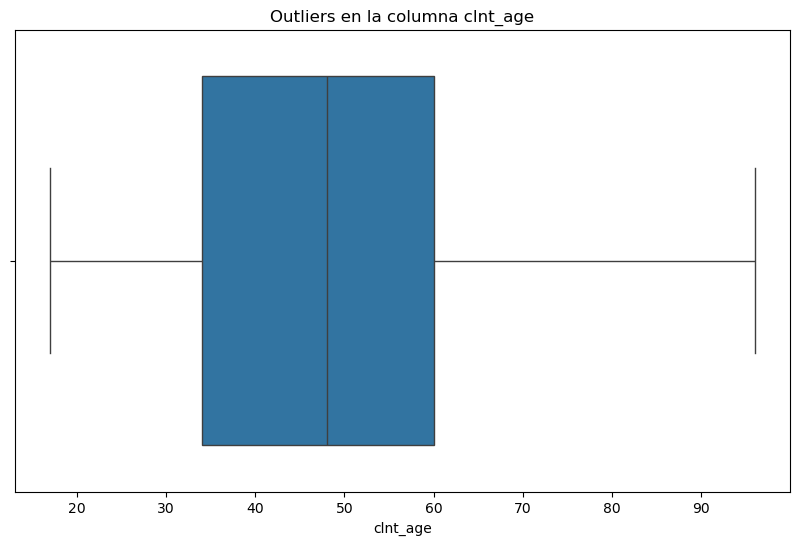

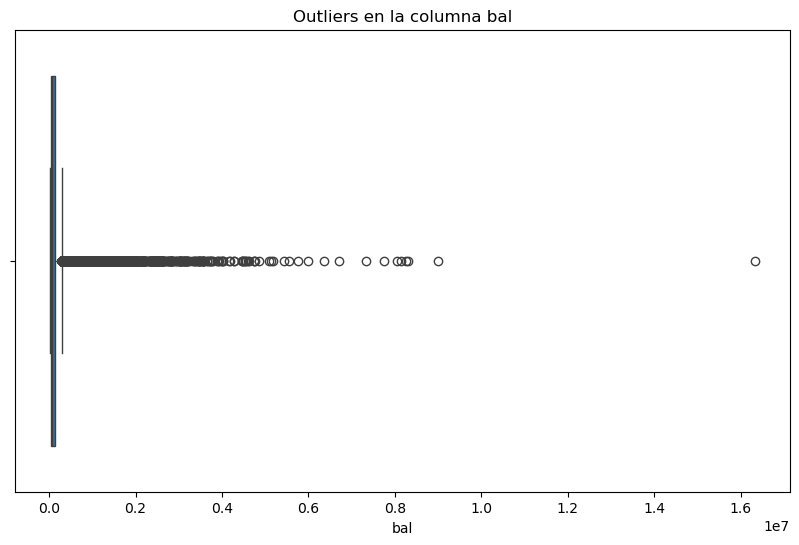

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_clean_users esté cargado
df_clean_users = pd.read_csv('../clean_data/df_clean_users.csv')

# Función para identificar outliers usando el método del IQR, excluyendo ciertas columnas
def find_outliers_iqr(df, exclude_columns):
    outliers = pd.DataFrame(columns=df.columns)
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if col not in exclude_columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers = pd.concat([outliers, outliers_in_col])
    return outliers.drop_duplicates()

# Columnas a excluir del análisis de outliers
exclude_columns = ['client_id', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']

# Encontrar outliers en el DataFrame excluyendo ciertas columnas
outliers = find_outliers_iqr(df_clean_users, exclude_columns)

# Mostrar los outliers encontrados
print(f"Total de outliers encontrados: {len(outliers)}")
print(outliers)

# Visualizar outliers en cada columna numérica, excluyendo ciertas columnas
for col in df_clean_users.select_dtypes(include=['float64', 'int64']).columns:
    if col not in exclude_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_clean_users[col])
        plt.title(f'Outliers en la columna {col}')
        plt.show()

## 7.1 Outliers in tenure

In [116]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil) para clnt_tenure_yr
Q1 = df_clean_users['clnt_tenure_yr'].quantile(0.25)
Q3 = df_clean_users['clnt_tenure_yr'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers_in_tenure_yr = df_clean_users[(df_clean_users['clnt_tenure_yr'] < lower_bound) | (df_clean_users['clnt_tenure_yr'] > upper_bound)]

# Mostrar cantidad de valores atípicos
print(f'Cantidad de valores atípicos en clnt_tenure_yr: {outliers_in_tenure_yr.shape[0]}')


Cantidad de valores atípicos en clnt_tenure_yr: 599


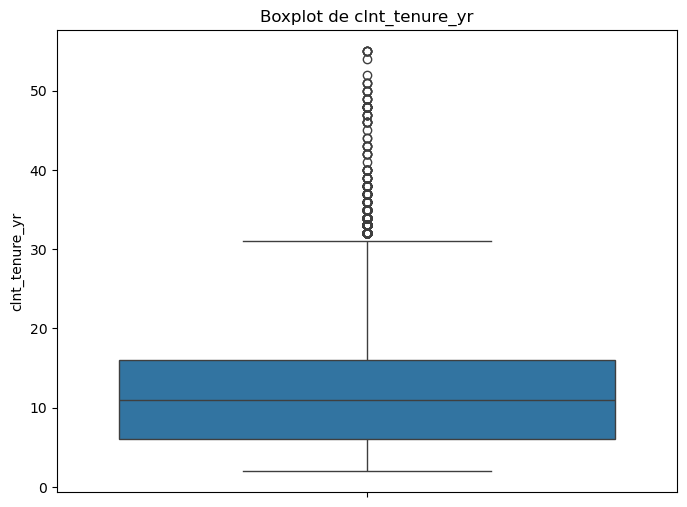

In [117]:
# Crear el boxplot para clnt_tenure_yr
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_users['clnt_tenure_yr'])

# Añadir título y etiquetas
plt.title('Boxplot de clnt_tenure_yr')
plt.ylabel('clnt_tenure_yr')

# Mostrar el gráfico
plt.show()

## 7.2 Outliers in bal

In [118]:
# Identificar outliers en la columna 'bal' usando IQR
Q1_bal = df_clean_users['bal'].quantile(0.25)
Q3_bal = df_clean_users['bal'].quantile(0.75)
IQR_bal = Q3_bal - Q1_bal

# Definir límites inferior y superior
lower_bound_bal = Q1_bal - 1.5 * IQR_bal
upper_bound_bal = Q3_bal + 1.5 * IQR_bal

# Identificar los outliers en 'bal'
outliers_after_bal = df_clean_users[(df_clean_users['bal'] < lower_bound_bal) | (df_clean_users['bal'] > upper_bound_bal)]

# Guardar los outliers en un archivo CSV
outliers_after_bal.to_csv('../sol_data/outliers_bal.csv', index=False)

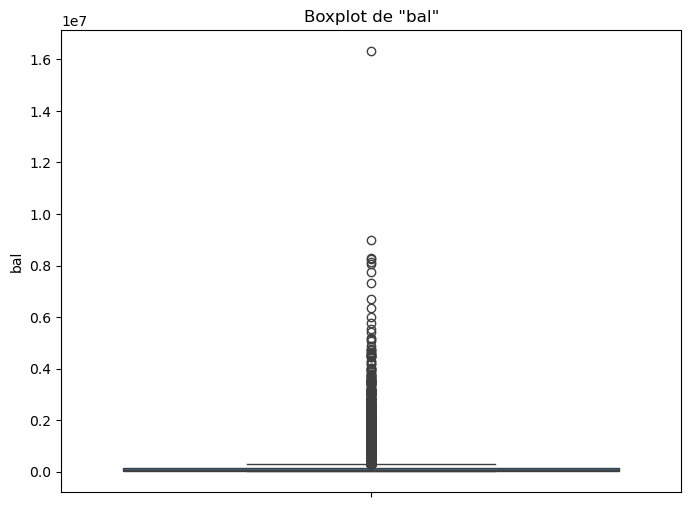

In [119]:
# Crear el boxplot para la columna 'bal'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_users['bal'])

# Añadir título y etiquetas
plt.title('Boxplot de "bal"')
plt.ylabel('bal')

# Mostrar el gráfico
plt.show()

## 7.3 Outliers in age

In [120]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_clean_users['clnt_age'].quantile(0.25)
Q3 = df_clean_users['clnt_age'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = df_clean_users[(df_clean_users['clnt_age'] < lower_bound) | (df_clean_users['clnt_age'] > upper_bound)]

# Mostrar cantidad de valores atípicos
print(f'Cantidad de valores atípicos en clnt_age: {outliers.shape[0]}')

Cantidad de valores atípicos en clnt_age: 0


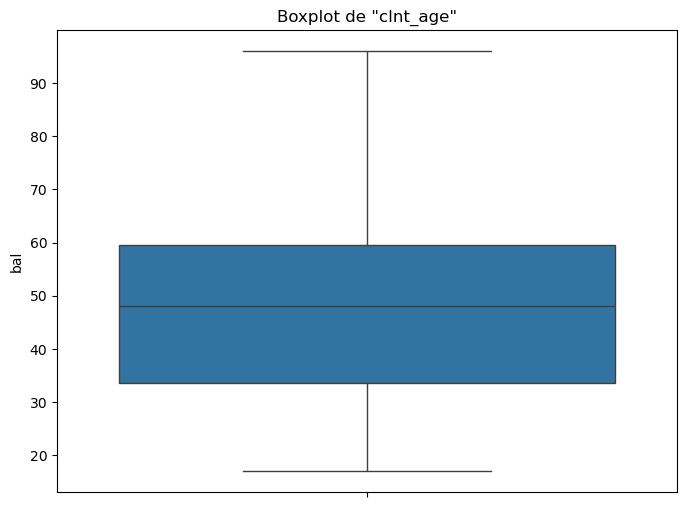

In [97]:
# Crear el boxplot para la columna 'bal'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_users['clnt_age'])

# Añadir título y etiquetas
plt.title('Boxplot de "clnt_age"')
plt.ylabel('bal')

# Mostrar el gráfico
plt.show()

# 8. Contraste de Hipótesis

Average time to complete all steps (Control): 315802.6212662666 seconds
Average time to complete all steps (Test): 228241.70653063452 seconds
T-statistic: 8.478492159282824
P-value: 2.3743668162269078e-17


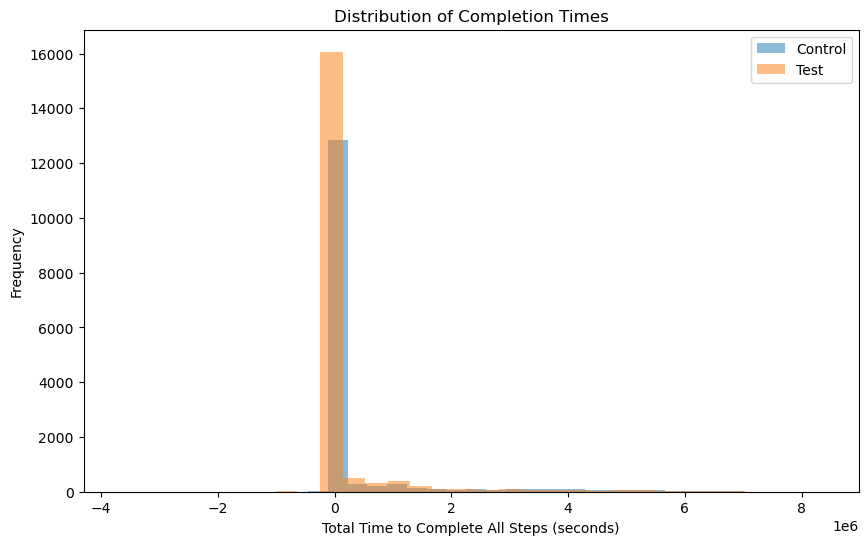

In [121]:
# Load cleaned data
df_clean_fp = pd.read_csv('../clean_data/df_clean_fp.csv', parse_dates=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Calculate time differences
df_clean_fp['total_time'] = (df_clean_fp['confirm'] - df_clean_fp['start']).dt.total_seconds()

# Separate control and test groups
control_group = df_clean_fp[df_clean_fp['variation'] == 'Control']
test_group = df_clean_fp[df_clean_fp['variation'] == 'Test']

# Calculate average time to complete all steps
avg_time_control = control_group['total_time'].mean()
avg_time_test = test_group['total_time'].mean()

print(f"Average time to complete all steps (Control): {avg_time_control} seconds")
print(f"Average time to complete all steps (Test): {avg_time_test} seconds")

# Perform statistical test
t_stat, p_value = stats.ttest_ind(control_group['total_time'].dropna(), test_group['total_time'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(control_group['total_time'].dropna(), bins=30, alpha=0.5, label='Control')
plt.hist(test_group['total_time'].dropna(), bins=30, alpha=0.5, label='Test')
plt.xlabel('Total Time to Complete All Steps (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Completion Times')
plt.legend()
plt.show()

Hipótesis 1: Tasa de Finalización
Hipótesis Nula (H0): La tasa de finalización del proceso no ha cambiado entre el grupo de control (interfaz tradicional) y el grupo de prueba (nueva interfaz).
Hipótesis Alternativa (H1): La tasa de finalización del proceso ha aumentado en el grupo de prueba en comparación con el grupo de control.

In [122]:
# Load cleaned data
df_clean_fp = pd.read_csv('../clean_data/df_clean_fp.csv', parse_dates=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Calculate completion status
df_clean_fp['is_completed'] = df_clean_fp['confirm'].notna()

# Separate control and test groups
control_group = df_clean_fp[df_clean_fp['variation'] == 'Control']
test_group = df_clean_fp[df_clean_fp['variation'] == 'Test']

# Calculate completion rates
completion_rate_control = control_group['is_completed'].mean()
completion_rate_test = test_group['is_completed'].mean()

print(f"Completion rate (Control): {completion_rate_control:.2%}")
print(f"Completion rate (Test): {completion_rate_test:.2%}")

# Perform proportions z-test
count = [control_group['is_completed'].sum(), test_group['is_completed'].sum()]
nobs = [len(control_group), len(test_group)]
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Rechazamos la hipótesis nula (H0). La tasa de finalización del proceso ha aumentado en el grupo de prueba en comparación con el grupo de control.")
else:
    print("No podemos rechazar la hipótesis nula (H0). La tasa de finalización del proceso no ha cambiado significativamente entre el grupo de control y el grupo de prueba.")

Completion rate (Control): 66.08%
Completion rate (Test): 69.41%
Z-statistic: -7.964312981322482
P-value: 0.9999999999999992
No podemos rechazar la hipótesis nula (H0). La tasa de finalización del proceso no ha cambiado significativamente entre el grupo de control y el grupo de prueba.


Hipótesis 2: Diferencias en Comportamiento por Demografía
Hipótesis Nula (H0): No hay diferencias significativas en la tasa de finalización del proceso entre diferentes grupos demográficos (por ejemplo, edad, género) en el grupo de prueba.
Hipótesis Alternativa (H1): Hay diferencias significativas en la tasa de finalización del proceso entre diferentes grupos demográficos en el grupo de prueba.

In [127]:
df_clean_users

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6,73,60,U,2,45105.30,6,9,Test
1,2304905,7,94,58,U,2,110860.30,6,9,Control
2,1439522,5,64,32,U,2,52467.79,6,9,Test
3,1562045,16,198,49,M,2,67454.65,3,6,Test
4,5126305,12,145,33,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50451,1780858,21,262,68,M,3,372100.59,6,9,Test
50452,6967120,21,260,68,M,3,4279873.38,6,9,Control
50453,5826160,20,249,56,F,2,44837.16,2,5,Test
50454,8739285,19,229,70,F,2,44994.24,1,4,Test


In [129]:
df_merged2

,index,client_id,start,step_1,step_2,step_3,confirm,variation_x,is_completed,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation_y
0,0,555,2017-04-15 12:57:56,2017-04-15 12:58:03,2017-04-15 12:58:35,2017-04-15 13:00:14,2017-04-15 13:00:34,Test,True,3,46,30,U,2,25454.66,2,6,Test
1,1,647,2017-04-12 15:41:28,2017-04-12 15:41:35,2017-04-12 15:41:53,2017-04-12 15:45:02,2017-04-12 15:47:45,Test,True,12,151,58,M,2,30525.80,0,4,Test
2,2,934,2017-04-18 02:36:30,NaT,NaT,NaT,NaT,Test,False,9,109,51,F,2,32522.88,0,3,Test
3,3,1028,2017-04-08 18:51:28,2017-04-08 18:52:17,2017-04-08 18:53:29,2017-04-08 18:58:04,NaT,Control,False,12,145,36,M,3,103520.22,1,4,Control
4,4,1104,2017-06-12 07:49:18,NaT,NaT,NaT,NaT,Control,False,5,66,48,U,3,154643.94,6,9,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50191,50191,9999150,2017-05-29 16:55:12,2017-05-29 16:55:18,NaT,NaT,NaT,Test,False,5,66,30,U,3,97141.71,6,9,Test
50192,50192,9999400,2017-04-20 05:21:28,2017-04-20 05:21:50,2017-04-20 05:22:17,2017-04-20 05:23:03,2017-04-20 05:23:27,Test,True,7,86,28,U,2,51787.04,0,3,Test
50193,50193,9999626,2017-05-14 09:07:51,2017-05-14 09:07:59,NaT,NaT,NaT,Test,False,9,113,35,M,2,36642.88,6,9,Test
50194,50194,9999729,2017-04-05 13:40:49,2017-04-05 13:41:04,2017-04-20 14:27:36,2017-05-08 16:09:19,2017-05-08 16:09:40,Test,True,10,124,31,F,3,107059.74,6,9,Test


Columns in df_clean_fp: Index(['index', 'client_id', 'start', 'step_1', 'step_2', 'step_3', 'confirm',
       'variation'],
      dtype='object')
Columns in df_clean_users: Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation'],
      dtype='object')
Demographic Group: gendr
Chi-square statistic: 36.22747237208466
P-value: 1.359265605456885e-08
Rechazamos la hipótesis nula (H0). Hay diferencias significativas en la tasa de finalización del proceso entre diferentes grupos demográficos (gendr) en el grupo de prueba.



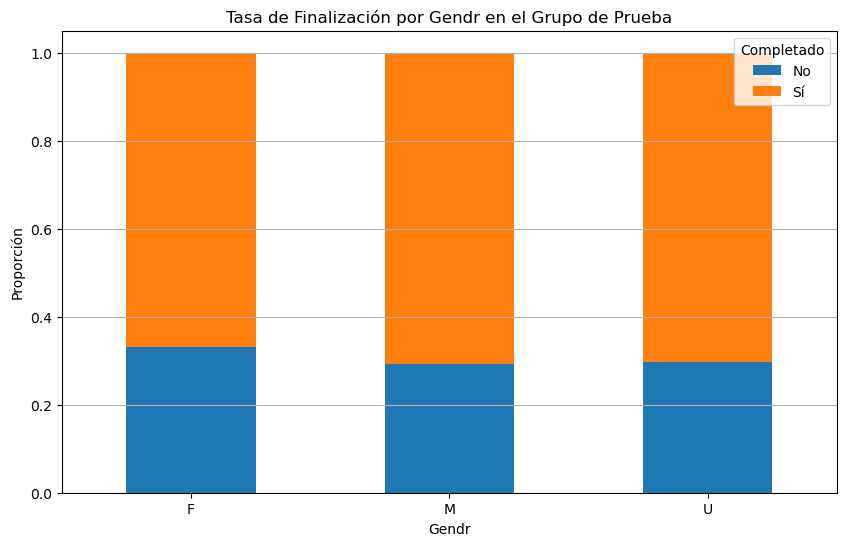

Demographic Group: clnt_age
Chi-square statistic: 5385.727399651974
P-value: 0.0
Rechazamos la hipótesis nula (H0). Hay diferencias significativas en la tasa de finalización del proceso entre diferentes grupos demográficos (clnt_age) en el grupo de prueba.



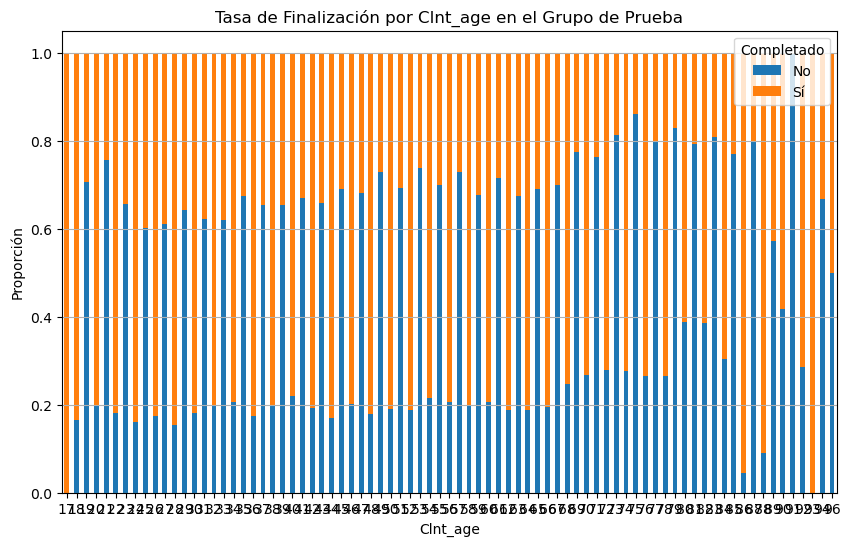

In [134]:
from scipy.stats import chi2_contingency

# Load cleaned data
df_clean_fp = pd.read_csv('../clean_data/df_clean_fp.csv', parse_dates=['start', 'step_1', 'step_2', 'step_3', 'confirm'])
df_clean_users = pd.read_csv('../clean_data/df_clean_users.csv')

# Inspect columns
print("Columns in df_clean_fp:", df_clean_fp.columns)
print("Columns in df_clean_users:", df_clean_users.columns)

# Ensure 'variation' column exists in both DataFrames
if 'variation' not in df_clean_fp.columns:
    print("Column 'variation' not found in df_clean_fp")
if 'variation' not in df_clean_users.columns:
    print("Column 'variation' not found in df_clean_users")

# Calculate completion status
df_clean_fp['is_completed'] = df_clean_fp['confirm'].notna()

# Merge demographic data with footprints data
df_merged2 = df_clean_fp.merge(df_clean_users, on='client_id')

# Filter for test group
test_group = df_merged2[df_merged2['variation_x'] == 'Test']

# Define demographic groups to analyze
demographic_groups = ['gendr', 'clnt_age']

# Perform chi-square test for each demographic group
for group in demographic_groups:
    # Create a contingency table
    contingency_table = pd.crosstab(test_group[group], test_group['is_completed'])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Demographic Group: {group}")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    
    # Interpret results
    if p < 0.05:
        print(f"Rechazamos la hipótesis nula (H0). Hay diferencias significativas en la tasa de finalización del proceso entre diferentes grupos demográficos ({group}) en el grupo de prueba.\n")
    else:
        print(f"No podemos rechazar la hipótesis nula (H0). No hay diferencias significativas en la tasa de finalización del proceso entre diferentes grupos demográficos ({group}) en el grupo de prueba.\n")

 #Visualize completion rates
    completion_rates = contingency_table.div(contingency_table.sum(1), axis=0)
    completion_rates.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Tasa de Finalización por {group.capitalize()} en el Grupo de Prueba')
    plt.xlabel(group.capitalize())
    plt.ylabel('Proporción')
    plt.legend(title='Completado', labels=['No', 'Sí'])
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()